state 州  
deaths 死者数  
drivers  1万人あたりドライバ数  
popden 1平方マイルあたり人口密度  
rural 田舎道の長さ  
temp 1月の1日の最大気温の平均値  
fuel 1年あたり燃料消費量

データセットの説明  
https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/road.html

ダウンロード先  
https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# ファイル読み込み
in_file = '../data/road.csv'
df = pd.read_csv(in_file, header=0, index_col='Unnamed: 0', sep=',')
df.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Alabama to Mont
Data columns (total 6 columns):
deaths     26 non-null int64
drivers    26 non-null int64
popden     26 non-null float64
rural      26 non-null float64
temp       26 non-null int64
fuel       26 non-null float64
dtypes: float64(3), int64(3)
memory usage: 1.4+ KB


In [4]:
df.describe()

,deaths,drivers,popden,rural,temp,fuel
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1000.653846,191.192308,595.734615,60.707692,43.692308,115.238462
std,946.842371,196.878037,2437.947300,38.378827,13.013129,83.857251
min,43.000000,11.000000,0.400000,0.000000,22.000000,6.200000
25%,571.500000,86.500000,31.750000,30.000000,33.750000,67.250000
50%,799.500000,148.500000,66.000000,65.500000,41.500000,104.500000
75%,1265.750000,226.250000,135.000000,93.500000,53.250000,154.500000
max,4743.000000,952.000000,12524.000000,124.000000,67.000000,350.000000


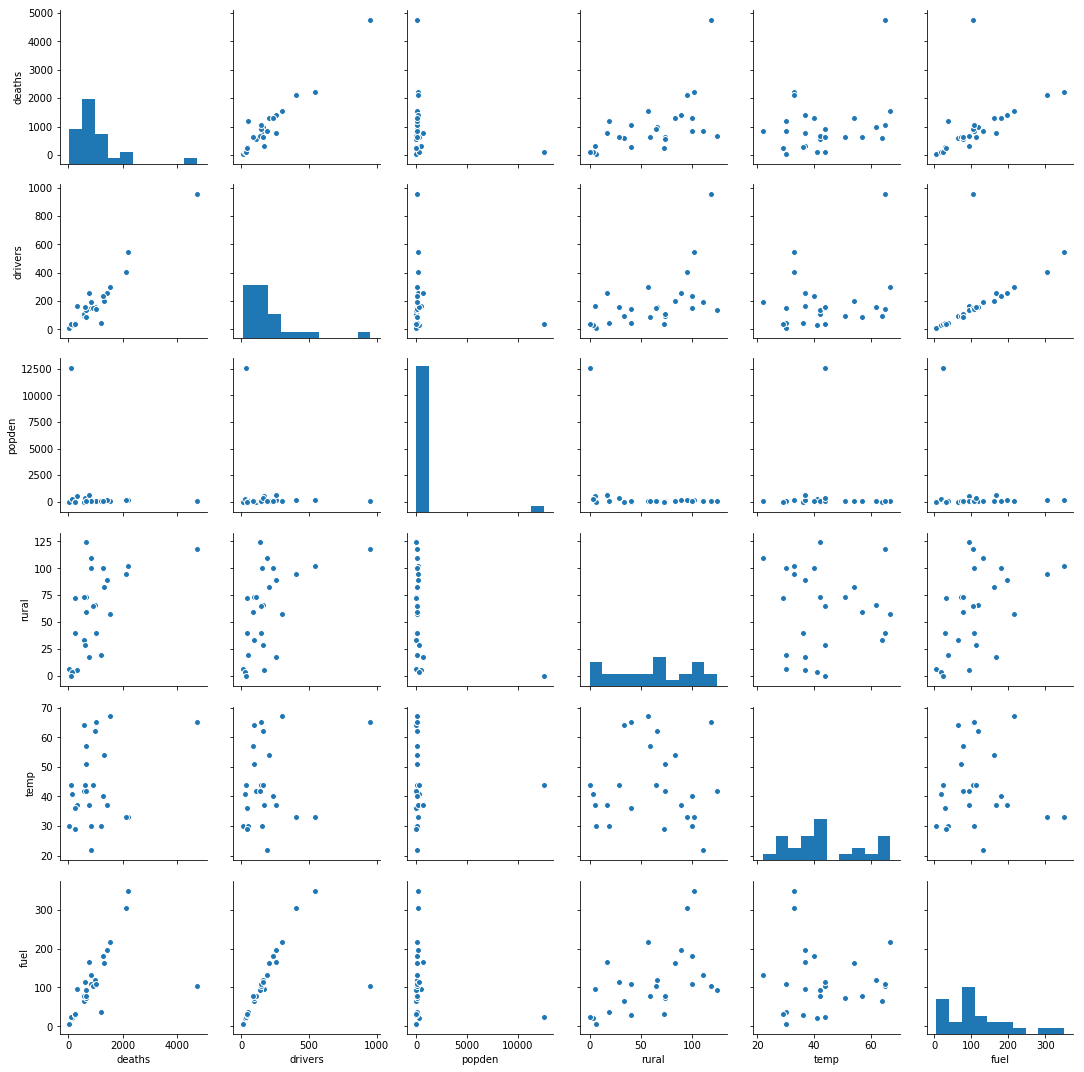

In [5]:
# 各特徴量で散布図作成
sns.pairplot(df, palette='husl');
plt.show()

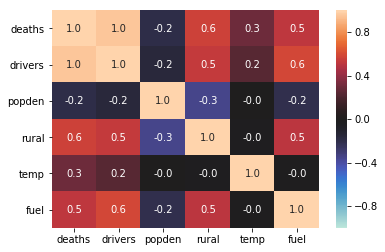

In [6]:
# 相関の確認
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [7]:
X = df.apply(lambda row: row/row.drivers, axis=1)
X = np.log(X.drop('drivers', axis=1)+1)
mx = X.mean()
Xc = X - mx
Sx = Xc.T.dot(Xc) / X.columns.size
a = np.diag(Xc.dot(np.linalg.inv(Sx).dot(Xc.T)))

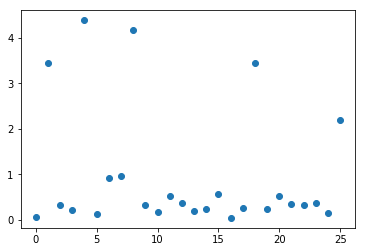

In [8]:
plt.plot(range(len(a)), a, 'o')
plt.show()

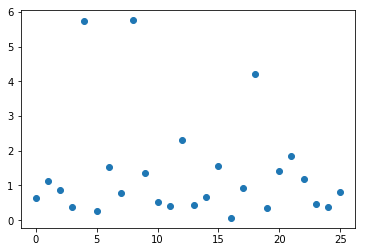

In [9]:
X = df
mx = X.mean()
Xc = X - mx
Sx = Xc.T.dot(Xc) / X.columns.size
a = np.diag(Xc.dot(np.linalg.inv(Sx).dot(Xc.T)))
plt.plot(range(len(a)), a, 'o')
plt.show()

In [10]:
def MT(X_train, X_test, y_test):
    # 標準化
    sc = StandardScaler()
    X_std = sc.fit_transform(X_train)
    
    # 標準化したXの相関係数行列
    X_std_corr = np.corrcoef(X_std, rowvar=False)
    
    # 逆行列の計算
    X_std_corr_inv = np.linalg.inv(X_std_corr) 
    
    # テスト
    X_test_std = sc.transform(X_test)
    X_test_dist = np.array([np.dot(x, np.dot(X_std_corr_inv, x)) for x in X_test_std])/X_test.shape[1]
    
    # 描画
    plt.plot(np.where(y_test==0)[0], X_test_dist[np.where(y_test==0)[0]], 'o', alpha=.3)
    plt.plot(np.where(y_test!=0)[0], X_test_dist[np.where(y_test!=0)[0]], 'o', color='r',  alpha=.7)
    plt.show()

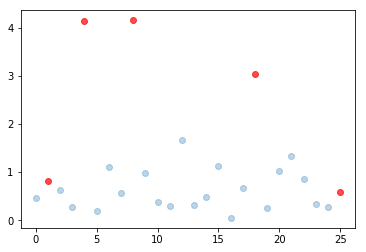

In [11]:
y = np.array([0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1])
MT(X, X, y)